<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/trabalhos_bolsa_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores para a DCT
Iteração 1 de 2
Iteração 2 de 2
Harmônica	Valor Real	Valor Estimado Médio	Erro Médio
1		1.0000		0.4370		0.0006
3		0.3333		0.1438		0.0002
7		0.1429		0.0561		0.0002
15		0.0667		0.0011		0.0003
27		0.0370		0.0006		0.0002
35		0.0286		0.0004		0.0001
45		0.0222		0.0003		0.0001


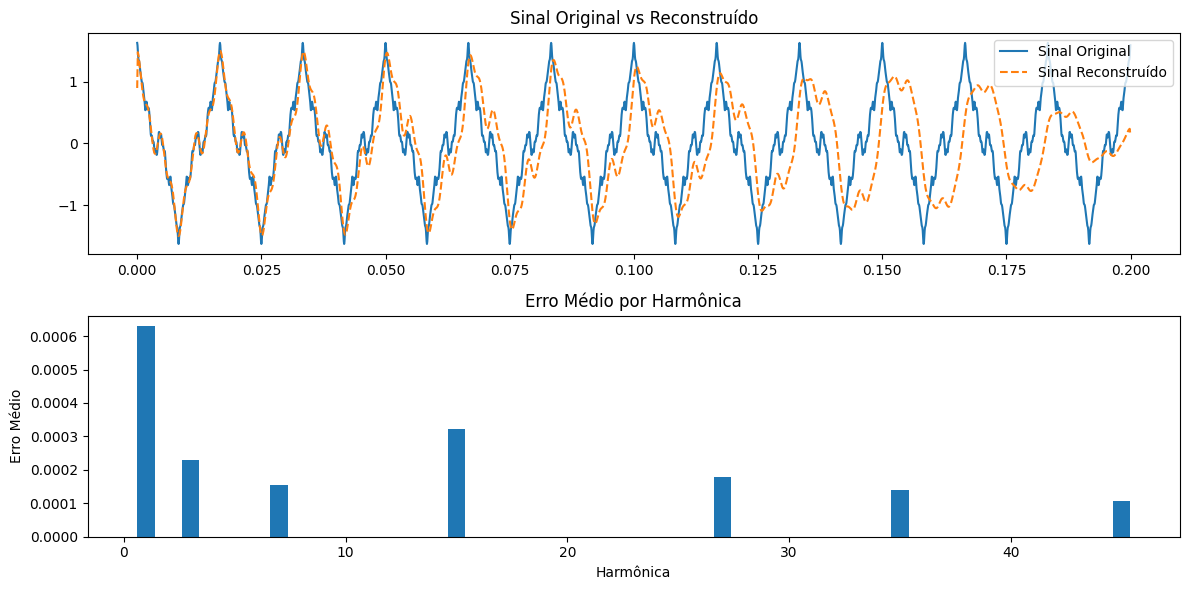

In [ ]:
import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

print("Valores para a DCT")

# Função para calcular o PRD (Peak Reconstructed Distortion)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * f  # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Nc * Nppc - 1) * Ts, Nc * Nppc)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Medição da FFT original
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = len(y)  # Tamanho do sinal
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Inicializando os erros
erros = np.zeros((200, len(harm)))  # Erros para cada harmônica
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Inicializando matrizes para armazenar os erros e valores estimados
a = 2
reconstructed_fft = np.zeros([len(x), a])
valores_estimados = np.zeros((a, len(harm)))  # Inicialização corrigida

for i in range(a):  # Iteração de reconstrução
    print(f"Iteração {i + 1} de {a}")

    # Amostras do sinal
    s = y[amostras_aleatorias]

    # Matriz de Transformada Cosseno
    A = spfft.dct(np.identity(N), norm='ortho', axis=0)
    A = A[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Aumentando o número de coeficientes
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal (sem normalização)
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Filtragem de suavização (opcional)
    sig_smooth = np.convolve(sig, np.ones(5)/5, mode='same')  # Suavização simples

    # Calculando a FFT do sinal reconstruído
    S = np.abs(np.fft.fft(sig_smooth) / len(sig_smooth))

    # Calculando os erros e valores estimados para cada harmônica
    for idx, h in enumerate(harm):
        # Cálculo correto do índice para a FFT (frequência harmônica)
        harmonic_index = int(h * f * N / Fs)

        # Verifica o índice dentro do intervalo válido
        harmonic_index = min(harmonic_index, len(S) - 1)

        valores_estimados[i, idx] = S[harmonic_index]  # Estimativa da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

# Calculando médias das estimativas e dos erros
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)

# Exibindo resultados
print("Harmônica\tValor Real\tValor Estimado Médio\tErro Médio")
for idx, h in enumerate(harm):
    print(f"{h}\t\t{1/h:.4f}\t\t{media_valores_estimados[idx]:.4f}\t\t{media_erros[idx]:.4f}")

# Exibindo gráficos de comparação
plt.figure(figsize=(12, 6))

# Sinal original e sinal reconstruído
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig_smooth, label='Sinal Reconstruído', linestyle='dashed')
plt.title("Sinal Original vs Reconstruído")
plt.legend()

# Erro médio por harmônica
plt.subplot(2, 1, 2)
plt.bar(harm, media_erros)
plt.title("Erro Médio por Harmônica")
plt.xlabel("Harmônica")
plt.ylabel("Erro Médio")
plt.tight_layout()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 12 18:21:04 2025

@author: josea
"""

import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

print("Valores para a DCT")

# Função para calcular o PRD (Peak Reconstructed Distortion)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * f  # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Nc * Nppc - 1) * Ts, Nc * Nppc)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Medição da FFT original
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = len(y)  # Tamanho do sinal
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Inicializando os erros
erros = np.zeros((200, len(harm)))  # Erros para cada harmônica
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Inicializando matrizes para armazenar os erros e valores estimados
a = 2
reconstructed_fft = np.zeros([len(x), a])
valores_estimados = np.zeros((a, len(harm)))  # Inicialização corrigida

for i in range(a):  # Iteração de reconstrução
    print(f"Iteração {i + 1} de {a}")

    # Amostras do sinal
    s = y[amostras_aleatorias]

    # Matriz de Transformada Cosseno (DCT)
    A = spfft.dct(np.eye(N), norm='ortho', axis=0)
    A = A[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=len(harm))  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal usando a DCT inversa
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Calculando a FFT do sinal reconstruído
    S = np.abs(np.fft.fft(sig) / len(sig))

    # Calculando os erros e valores estimados para cada harmônica
    for idx, h in enumerate(harm):
        # Cálculo correto do índice para a FFT (frequência harmônica)
        harmonic_index = int(h * f * N / Fs)

        # Verifica o índice dentro do intervalo válido
        harmonic_index = min(harmonic_index, len(S) - 1)

        valores_estimados[i, idx] = S[harmonic_index]  # Estimativa da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

# Calculando médias das estimativas e dos erros
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)

# Exibindo resultados
print("Harmônica\tValor Real\tValor Estimado Médio\tErro Médio")
for idx, h in enumerate(harm):
    print(f"{h}\t\t{1/h:.4f}\t\t{media_valores_estimados[idx]:.4f}\t\t{media_erros[idx]:.4f}")

# Exibindo gráficos de comparação
plt.figure(figsize=(12, 6))

# Sinal original e sinal reconstruído
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.title("Sinal Original vs Reconstruído")
plt.legend()

# Erro médio por harmônica
plt.subplot(2, 1, 2)
plt.bar(harm, media_erros)
plt.title("Erro Médio por Harmônica")
plt.xlabel("Harmônica")
plt.ylabel("Erro Médio")
plt.tight_layout()
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 12 18:21:04 2025

@author: josea
"""

import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

print("Valores para a DCT")

# Função para calcular o PRD (Peak Reconstructed Distortion)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * f  # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Nc * Nppc - 1) * Ts, Nc * Nppc)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Medição da FFT original
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão reduzida (%)
N = len(y)  # Tamanho do sinal
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Inicializando os erros
erros = np.zeros((200, len(harm)))  # Erros para cada harmônica
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Inicializando matrizes para armazenar os erros e valores estimados
a = 2
reconstructed_fft = np.zeros([len(x), a])  # Armazena as FFTs reconstruídas
valores_estimados = np.zeros((a, len(harm)))  # Valores estimados
valores_reais = np.array([1 / h for h in harm])  # Valores reais 1/h para cada harmônica

# Matriz de Transformada Cosseno (DCT) - Calculada uma única vez
A = spfft.dct(np.eye(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]  # Seleciona apenas as amostras aleatórias

# Loop de reconstrução
for i in range(a):  # Iteração de reconstrução
    print(f"Iteração {i + 1} de {a}")

    # Amostras do sinal
    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal usando a DCT inversa
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = np.abs(np.fft.fft(sig) / len(sig))

    # Armazenando a FFT reconstruída
    reconstructed_fft[i,:] = S

    # Calculando os erros e valores estimados para cada harmônica
    for idx, h in enumerate(harm):
        # Cálculo correto do índice para a FFT (frequência harmônica)
        harmonic_index = int(h * f * N / Fs)

        # Verifica o índice dentro do intervalo válido
        harmonic_index = min(harmonic_index, len(S) - 1)

        valores_estimados[i,idx] = S[harmonic_index]  # Estimativa da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

    # Cálculo do PRD e RMSE para esta iteração
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

# Calculando a média dos valores estimados
media_valores_estimados = np.zeros(len(x))
for kk in range(len(x)):
    media_valores_estimados[kk] = np.sum(abs(reconstructed_fft[kk:])) / a

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo resultados
print("Harmônica\tValor Real\tValor Estimado Médio\tErro Médio")
for idx, h in enumerate(harm):
    print(f"{h}\t\t{1/h:.4f}\t\t{media_valores_estimados[int(h * f * N / Fs)]:.4f}\t\t{media_erros[idx]:.4f}")

# Exibindo métricas de erro
print(f"\nMédia do PRD: {media_prd:.4f}")
print(f"Média do RMSE: {media_rmse:.4f}")

# Exibindo gráficos de comparação
plt.figure(figsize=(12, 6))

# Sinal original e sinal reconstruído
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.title("Sinal Original vs Reconstruído")
plt.legend()

# Erro médio por harmônica
plt.subplot(2, 1, 2)
plt.bar(harm, media_erros)
plt.title("Erro Médio por Harmônica")
plt.xlabel("Harmônica")
plt.ylabel("Erro Médio")
plt.tight_layout()
plt.show()

Valores para a DCT
Iteração 1 de 2


ValueError: could not broadcast input array from shape (3072,) into shape (2,)

Valores para a DCT
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
It

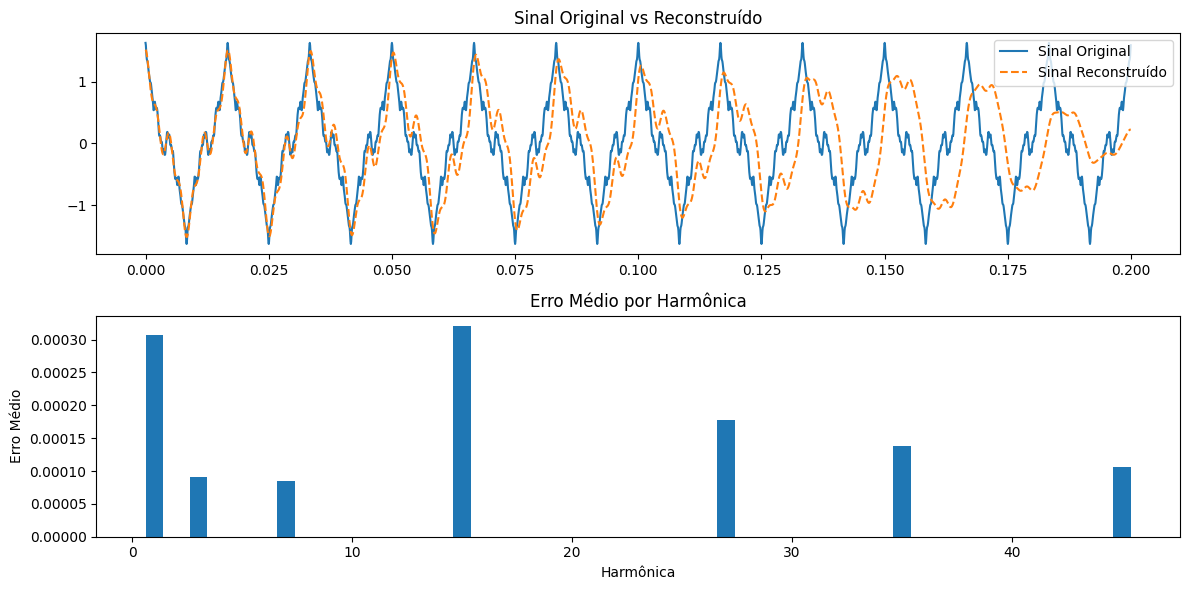

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 12 18:21:04 2025

@author: josea
"""

import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit
import matplotlib.pyplot as plt

print("Valores para a DCT")

# Função para calcular o PRD (Peak Reconstructed Distortion)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = Nppc * f  # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Nc * Nppc - 1) * Ts, Nc * Nppc)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Medição da FFT original
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão reduzida (%)
N = len(y)  # Tamanho do sinal
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Inicializando os erros
erros = np.zeros((200, len(harm)))  # Erros para cada harmônica
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Inicializando matrizes para armazenar os erros e valores estimados
a = 200
reconstructed_fft = np.zeros([a, len(x)])  # Armazena as FFTs reconstruídas (agora com forma [a, len(x)])
valores_estimados = np.zeros((a, len(harm)))  # Valores estimados
valores_reais = np.array([1 / h for h in harm])  # Valores reais 1/h para cada harmônica

# Matriz de Transformada Cosseno (DCT) - Calculada uma única vez
A = spfft.dct(np.eye(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]  # Seleciona apenas as amostras aleatórias

# Loop de reconstrução
for i in range(a):  # Iteração de reconstrução
    print(f"Iteração {i + 1} de {a}")

    # Amostras do sinal
    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal usando a DCT inversa
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = np.abs(np.fft.fft(sig) / len(sig))

    # Armazenando a FFT reconstruída
    reconstructed_fft[i, :] = S  # Agora a atribuição funciona corretamente

    # Calculando os erros e valores estimados para cada harmônica
    for idx, h in enumerate(harm):
        # Cálculo correto do índice para a FFT (frequência harmônica)
        harmonic_index = int(h * f * N / Fs)

        # Verifica o índice dentro do intervalo válido
        harmonic_index = min(harmonic_index, len(S) - 1)

        valores_estimados[i, idx] = S[harmonic_index]  # Estimativa da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

    # Cálculo do PRD e RMSE para esta iteração
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

# Calculando a média dos valores estimados
media_valores_estimados = np.zeros(len(x))
for kk in range(len(x)):
    media_valores_estimados[kk] = np.sum(abs(reconstructed_fft[:, kk])) / a  # Corrigido para somar ao longo do eixo 0

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo resultados
print("Harmônica\tValor Real\tValor Estimado Médio\tErro Médio")
for idx, h in enumerate(harm):
    print(f"{h}\t\t{1/h:.4f}\t\t{media_valores_estimados[int(h * f * N / Fs)]:.4f}\t\t{media_erros[idx]:.4f}")

# Exibindo métricas de erro
print(f"\nMédia do PRD: {media_prd:.4f}")
print(f"Média do RMSE: {media_rmse:.4f}")

# Exibindo gráficos de comparação
plt.figure(figsize=(12, 6))

# Sinal original e sinal reconstruído
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.title("Sinal Original vs Reconstruído")
plt.legend()

# Erro médio por harmônica
plt.subplot(2, 1, 2)
plt.bar(harm, media_erros)
plt.title("Erro Médio por Harmônica")
plt.xlabel("Harmônica")
plt.ylabel("Erro Médio")
plt.tight_layout()
plt.show()

Iteração 1 de 200 (0.5%)
Iteração 2 de 200 (1.0%)
Iteração 3 de 200 (1.5%)
Iteração 4 de 200 (2.0%)
Iteração 5 de 200 (2.5%)
Iteração 6 de 200 (3.0%)
Iteração 7 de 200 (3.5%)
Iteração 8 de 200 (4.0%)
Iteração 9 de 200 (4.5%)
Iteração 10 de 200 (5.0%)
Iteração 11 de 200 (5.5%)
Iteração 12 de 200 (6.0%)
Iteração 13 de 200 (6.5%)
Iteração 14 de 200 (7.0%)
Iteração 15 de 200 (7.5%)
Iteração 16 de 200 (8.0%)
Iteração 17 de 200 (8.5%)
Iteração 18 de 200 (9.0%)
Iteração 19 de 200 (9.5%)
Iteração 20 de 200 (10.0%)
Iteração 21 de 200 (10.5%)
Iteração 22 de 200 (11.0%)
Iteração 23 de 200 (11.5%)
Iteração 24 de 200 (12.0%)
Iteração 25 de 200 (12.5%)
Iteração 26 de 200 (13.0%)
Iteração 27 de 200 (13.5%)
Iteração 28 de 200 (14.0%)
Iteração 29 de 200 (14.5%)
Iteração 30 de 200 (15.0%)
Iteração 31 de 200 (15.5%)
Iteração 32 de 200 (16.0%)
Iteração 33 de 200 (16.5%)
Iteração 34 de 200 (17.0%)
Iteração 35 de 200 (17.5%)
Iteração 36 de 200 (18.0%)
Iteração 37 de 200 (18.5%)
Iteração 38 de 200 (19.0%)
It

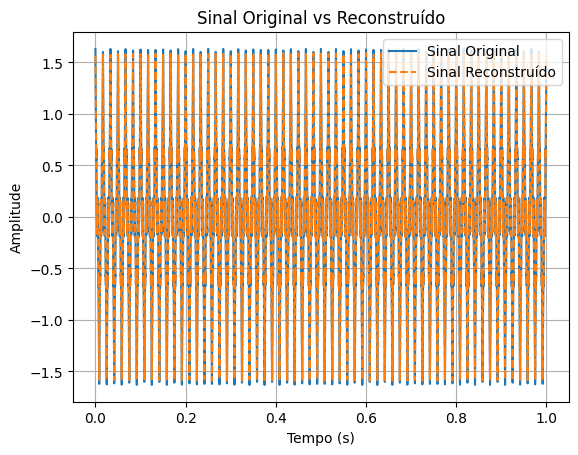

NameError: name 't_tres_ciclos' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 24 08:54:39 2025

@author: josea
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12        # Número de ciclos
f = 60         # Frequência fundamental (Hz)
Fs = 8192      # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for i in range(len(harm)):
    y += (1 / harm[i]) * np.cos(2 * np.pi * harm[i] * f * t)

# Medição da FFT original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y) // 2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y) // 2]

# Amostragem Compressiva
CR = 50  # Taxa de compressão (%)
N = Fs
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y[amostras_aleatorias]
t2 = t[amostras_aleatorias]

# Matriz de Transformada Cosseno
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# Inicializando matrizes para armazenar os erros, valores estimados, RMSE e PRD
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))  # Erros para cada harmônica
valores_estimados = np.zeros((num_iteracoes, len(harm)))  # Valores estimados
rmse_values = np.zeros(num_iteracoes)  # Para armazenar os valores de RMSE
prd_values = np.zeros(num_iteracoes)   # Para armazenar os valores de PRD

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i+1} de {num_iteracoes} ({(i+1)/num_iteracoes*100:.1f}%)")

    # Gerando amostras aleatórias do sinal
    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig) // 2]

    # Calculando os valores estimados e erros para cada harmônica
    for idx, h in enumerate(harm):
        harmonic_index = int(h * f * N / Fs)  # Índice da harmônica na FFT
        harmonic_index = min(harmonic_index, len(S) - 1)  # Garantir que o índice esteja dentro dos limites
        valores_estimados[i, idx] = S[harmonic_index]  # Valor estimado da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

    # Calculando o RMSE e PRD para esta iteração
    rmse_values[i] = calculate_rmse(y, sig)
    prd_values[i] = calculate_prd(y, sig)

# Calculando as médias
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo os resultados
print("\nValores Estimados Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_valores_estimados[idx]:.4f}")

print("\nErros Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}")

# Gráficos finais
plt.figure()
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Original vs Reconstruído')
plt.grid()
plt.show()




Média do erro nas harmônicas (Amostragem Compressiva):
Harmônica 1: 0.0000
Harmônica 3: 0.0000
Harmônica 7: 0.0000
Harmônica 15: 0.0000
Harmônica 27: 0.0000
Harmônica 35: 0.0000
Harmônica 45: 0.0000

Média do RMSE (Amostragem Compressiva): 0.0000
Média do PRD (Amostragem Compressiva): 0.0000%


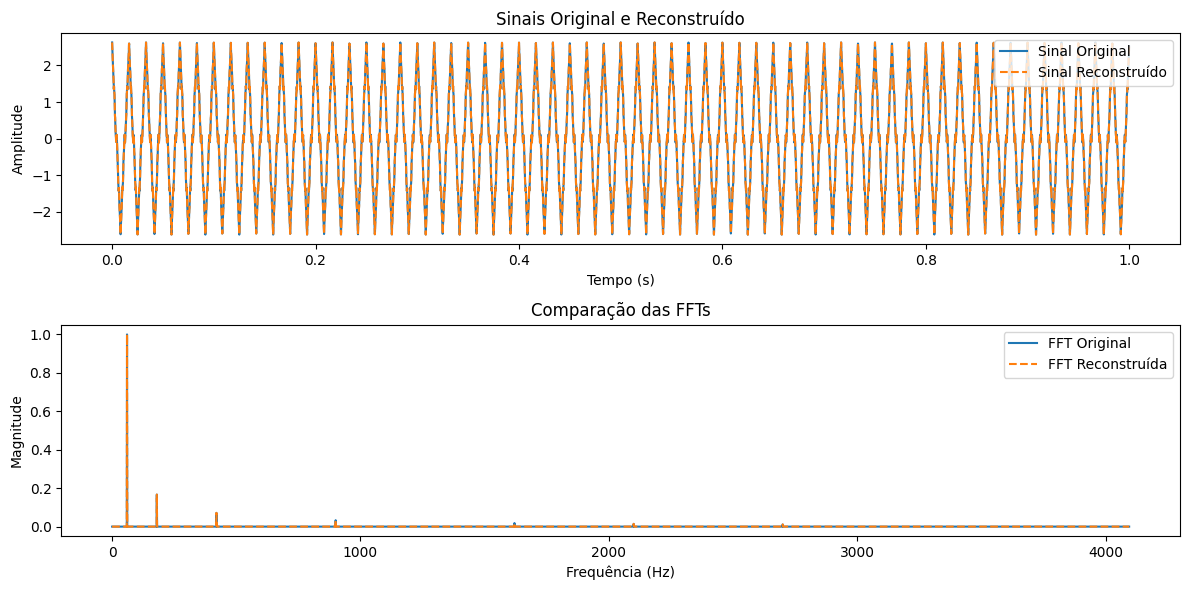

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Loop de reconstrução
for i in range(200):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

    print(f"Iteração:{i+1} de 200")

# Média dos erros para as harmônicas
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibir os resultados
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd:.4f}%")

# Gerar gráficos
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Sinais Original e Reconstruído')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='FFT Original')
plt.plot(frequencies[:N//2], np.abs(reconstructed_fft[:N//2]), label='FFT Reconstruída', linestyle='dashed')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Comparação das FFTs')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Frequência de amostragem mínima de Nyquist
f_max = max(harm) * f  # Maior frequência presente no sinal
Fs_nyquist = 2 * f_max  # Frequência de amostragem de Nyquist

# Parâmetros de amostragem de Nyquist
Ts_nyquist = 1 / Fs_nyquist
t_nyquist = np.linspace(0, (Fs_nyquist - 1) * Ts_nyquist, Fs_nyquist)
y_nyquist = np.cos(2 * np.pi * f * t_nyquist)

# Gerar o sinal Nyquist com componentes harmônicas
for h in harm:
    y_nyquist += (1 / h) * np.cos(2 * np.pi * h * f * t_nyquist)

# FFT do sinal de Nyquist (normalizada)
original_fft_nyquist = np.fft.fft(y_nyquist) / len(y_nyquist)
frequencies_nyquist = np.fft.fftfreq(len(y_nyquist), d=Ts_nyquist)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros para a amostragem compressiva
erros = np.zeros((200, 7))
rmse_values_compressiva = np.zeros(200)
prd_values_compressiva = np.zeros(200)

# Loop de reconstrução para amostragem compressiva
for i in range(200):
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    prd_values_compressiva[i] = calculate_prd(y, sig)
    rmse_values_compressiva[i] = calculate_rmse(y, sig)
    reconstructed_fft_compressiva = np.fft.fft(sig) / len(sig)

    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft_compressiva[idx])

# Média dos erros para as harmônicas na amostragem compressiva
erros_medios_compressiva = np.mean(erros, axis=0)
media_rmse_compressiva = np.mean(rmse_values_compressiva)
media_prd_compressiva = np.mean(prd_values_compressiva)

# Exibir os resultados para a amostragem compressiva
print("\nMédia do erro nas harmônicas (Amostragem Compressiva):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_compressiva[idx]:.4f}")
print(f"\nMédia do RMSE (Amostragem Compressiva): {media_rmse_compressiva:.4f}")
print(f"Média do PRD (Amostragem Compressiva): {media_prd_compressiva:.4f}%")

# Média de erros para a amostragem de Nyquist
rmse_nyquist = calculate_rmse(y_nyquist, y_nyquist)  # O erro é zero, pois a amostragem é feita corretamente
prd_nyquist = calculate_prd(y_nyquist, y_nyquist)

# Exibir os resultados para a amostragem de Nyquist
print(f"\nMédia do RMSE (Amostragem Nyquist): {rmse_nyquist:.4f}")
print(f"Média do PRD (Amostragem Nyquist): {prd_nyquist:.4f}%")

# Comparar resultados
print("\nComparação dos Resultados:")
print(f"RMSE (Amostragem Compressiva) vs Nyquist: {media_rmse_compressiva:.4f} vs {rmse_nyquist:.4f}")
print(f"PRD (Amostragem Compressiva) vs Nyquist: {media_prd_compressiva:.4f}% vs {prd_nyquist:.4f}%")

# Mostrar número de iterações para a reconstrução com OMP
print(f"\nNúmero de iterações de reconstrução com OMP: 200")



Média do erro nas harmônicas (Amostragem Compressiva):
Harmônica 1: 0.0000
Harmônica 3: 0.0000
Harmônica 7: 0.0000
Harmônica 15: 0.0000
Harmônica 27: 0.0000
Harmônica 35: 0.0000
Harmônica 45: 0.0000

Média do RMSE (Amostragem Compressiva): 0.0000
Média do PRD (Amostragem Compressiva): 0.0000%

Média do RMSE (Amostragem Nyquist): 0.0000
Média do PRD (Amostragem Nyquist): 0.0000%

Comparação dos Resultados:
RMSE (Amostragem Compressiva) vs Nyquist: 0.0000 vs 0.0000
PRD (Amostragem Compressiva) vs Nyquist: 0.0000% vs 0.0000%

Número de iterações de reconstrução com OMP: 200


Iniciando a reconstrução do sinal usando Amostragem Compressiva...
Iteração 0/8192 - Reconstruindo coeficiente 0
Iteração 100/8192 - Reconstruindo coeficiente 100
Iteração 200/8192 - Reconstruindo coeficiente 200
Iteração 300/8192 - Reconstruindo coeficiente 300
Iteração 400/8192 - Reconstruindo coeficiente 400
Iteração 500/8192 - Reconstruindo coeficiente 500
Iteração 600/8192 - Reconstruindo coeficiente 600
Iteração 700/8192 - Reconstruindo coeficiente 700
Iteração 800/8192 - Reconstruindo coeficiente 800
Iteração 900/8192 - Reconstruindo coeficiente 900
Iteração 1000/8192 - Reconstruindo coeficiente 1000
Iteração 1100/8192 - Reconstruindo coeficiente 1100
Iteração 1200/8192 - Reconstruindo coeficiente 1200
Iteração 1300/8192 - Reconstruindo coeficiente 1300
Iteração 1400/8192 - Reconstruindo coeficiente 1400
Iteração 1500/8192 - Reconstruindo coeficiente 1500
Iteração 1600/8192 - Reconstruindo coeficiente 1600
Iteração 1700/8192 - Reconstruindo coeficiente 1700
Iteração 1800/8192 - 

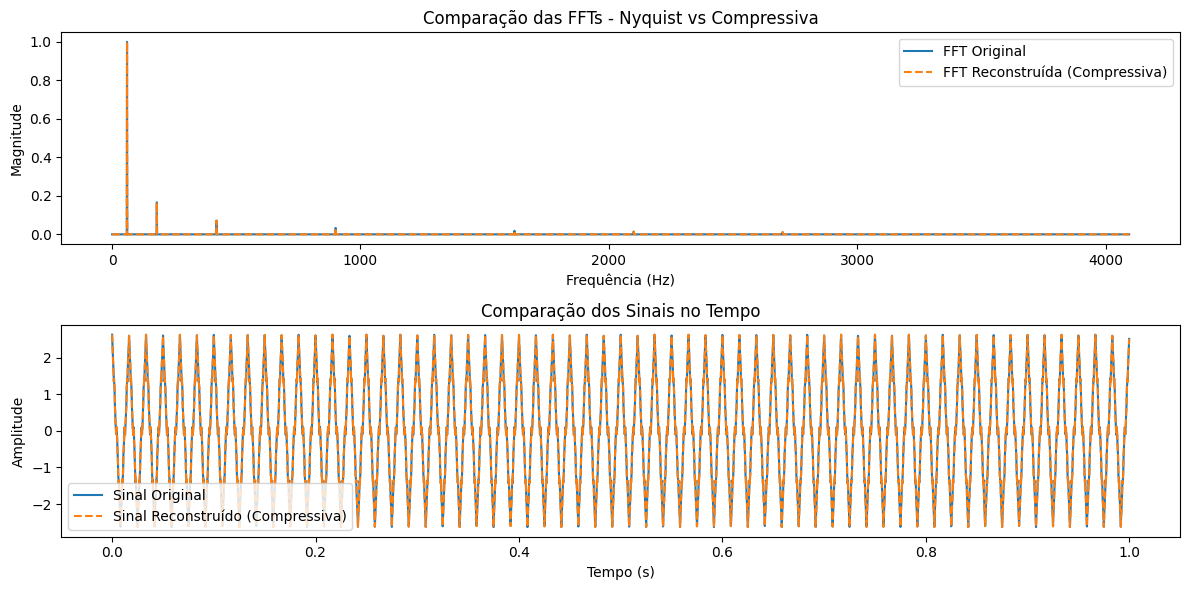

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# FFT do sinal original (normalizada)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# ===============================
# Amostragem de Nyquist (sem compressão)
# ===============================
nyquist_signal = y  # Sinal amostrado de Nyquist

# ================================
# Amostragem Compressiva
# ================================
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na FFT (complexa)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária da matriz A
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicializando os erros
erros_nyquist = np.zeros(len(harm))
erros_compressiva = np.zeros(len(harm))

# Loop de reconstrução para Amostragem Compressiva
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
omp.fit(A_real, s_real)
recovered_coeffs = omp.coef_

# Mensagem de progresso do iterador
print("Iniciando a reconstrução do sinal usando Amostragem Compressiva...")

# Iterando sobre os coeficientes para exibir o progresso
for iteration in range(len(recovered_coeffs)):
    if iteration % 100 == 0:  # Exibe a cada 100 iterações
        print(f"Iteração {iteration}/{len(recovered_coeffs)} - Reconstruindo coeficiente {iteration}")

# Sinal reconstruído pela Amostragem Compressiva
sig_compressiva = np.fft.ifft(recovered_coeffs)
sig_compressiva = np.real(sig_compressiva)
sig_compressiva = sig_compressiva * (np.max(y) / np.max(sig_compressiva))

# Calcular os erros médios por harmônica
for i, h in enumerate(harm):
    # Índices das harmônicas
    idx_harm = int(h * f * len(y) / Fs)

    # Erros para Amostragem de Nyquist
    erros_nyquist[i] = np.abs(original_fft[idx_harm] - np.fft.fft(nyquist_signal)[idx_harm] / len(nyquist_signal))

    # Erros para Amostragem Compressiva
    reconstructed_fft_compressiva = np.fft.fft(sig_compressiva) / len(sig_compressiva)
    erros_compressiva[i] = np.abs(original_fft[idx_harm] - reconstructed_fft_compressiva[idx_harm])

# Calcular RMSE e PRD
rmse_nyquist = calculate_rmse(y, nyquist_signal)
rmse_compressiva = calculate_rmse(y, sig_compressiva)

prd_nyquist = calculate_prd(y, nyquist_signal)
prd_compressiva = calculate_prd(y, sig_compressiva)

# Exibir os resultados dos erros médios por harmônica
print("\nErros Médios por Harmônica:")
for i, h in enumerate(harm):
    print(f"Harmônica {h}: Nyquist = {erros_nyquist[i]:.4f}, Compressiva = {erros_compressiva[i]:.4f}")

# Exibir o RMSE e PRD
print(f"\nRMSE (Amostragem de Nyquist): {rmse_nyquist:.4f}")
print(f"RMSE (Amostragem Compressiva): {rmse_compressiva:.4f}")
print(f"PRD (Amostragem de Nyquist): {prd_nyquist:.4f}%")
print(f"PRD (Amostragem Compressiva): {prd_compressiva:.4f}%")

# Gerar gráficos para comparação espectral
plt.figure(figsize=(12, 6))

# Comparação das FFTs
plt.subplot(2, 1, 1)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='FFT Original')
plt.plot(frequencies[:N//2], np.abs(np.fft.fft(sig_compressiva)[:N//2]) / len(sig_compressiva), label='FFT Reconstruída (Compressiva)', linestyle='--')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Comparação das FFTs - Nyquist vs Compressiva')

# Comparação de sinais no tempo
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig_compressiva, label='Sinal Reconstruído (Compressiva)', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Comparação dos Sinais no Tempo')

plt.tight_layout()
plt.show()


cosamp, dft
Iteração 1 de 200


<ipython-input-22-79d7c9e9c6ce>:74: ComplexWarning: Casting complex values to real discards the imaginary part
  x[support.astype(int)] = x_selected
<ipython-input-22-79d7c9e9c6ce>:103: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_dft[i, :] = np.fft.fft(sig)


Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 53 de 200
Iteração 54 de 200
I

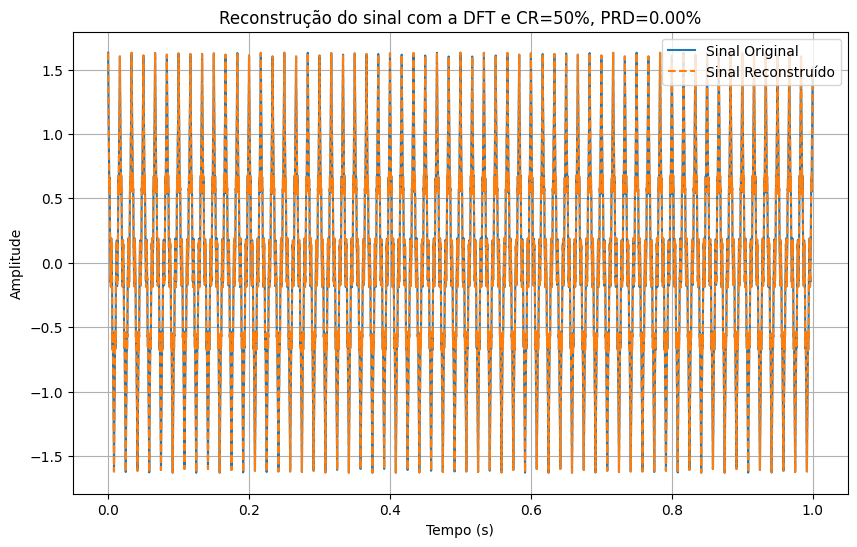

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("cosamp, dft")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256 # Número de pontos por ciclo
Nc = 12         # Número de ciclos
f = 60          # Frequência fundamental (Hz)
Fs = 8192       # Frequência de amostragem
Ts = 1 / Fs     # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DFT do sinal original
original_dft = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50 # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DFT
A = np.fft.fft(np.eye(N), axis=0)
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=5):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dft = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=5)

    # Reconstrução do sinal no domínio do tempo usando IDFT
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DFT do sinal reconstruído
    reconstructed_dft[i, :] = np.fft.fft(sig)

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dft[idx] - reconstructed_dft[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dft = np.sum(reconstructed_dft) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DFT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()


cosamp, dct
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 

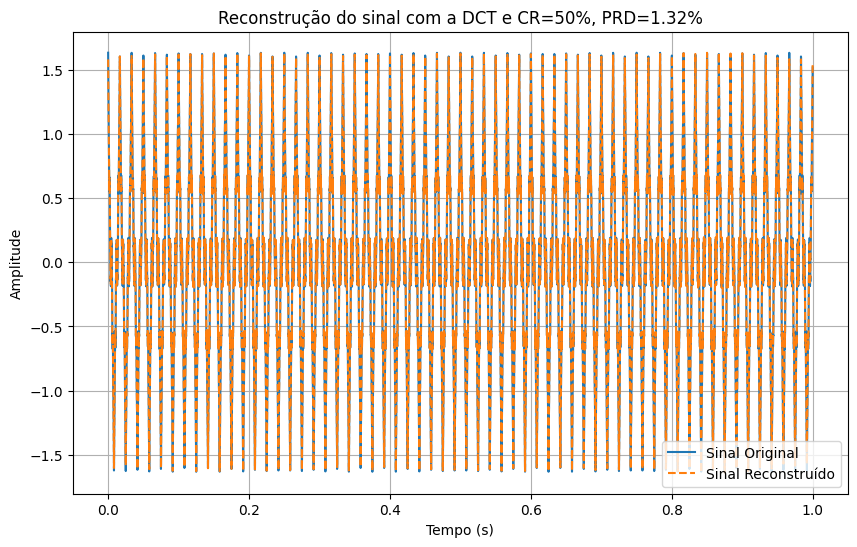

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

print("cosamp, dct")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12  # Número de ciclos
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DCT do sinal original
original_dct = dct(y, norm='ortho')  # DCT para o sinal original
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 50  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DCT
A = dct(np.eye(N), norm='ortho')  # DCT da matriz identidade
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=5):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dct = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência (DCT)
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=5)

    # Reconstrução do sinal no domínio do tempo usando a IDCT
    sig = idct(recovered_coeffs, norm='ortho')  # IDCT para reconstrução
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DCT do sinal reconstruído
    reconstructed_dct[i, :] = dct(sig, norm='ortho')

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dct[idx] - reconstructed_dct[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dct = np.sum(reconstructed_dct) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DCT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()
